# predict pima indians diabetes using deeplearning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data/pima-indians-diabetes.csv", 
                 names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "diabetes"])


In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
df[['pregnant', 'diabetes']]

,pregnant,diabetes
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [6]:
df['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [7]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


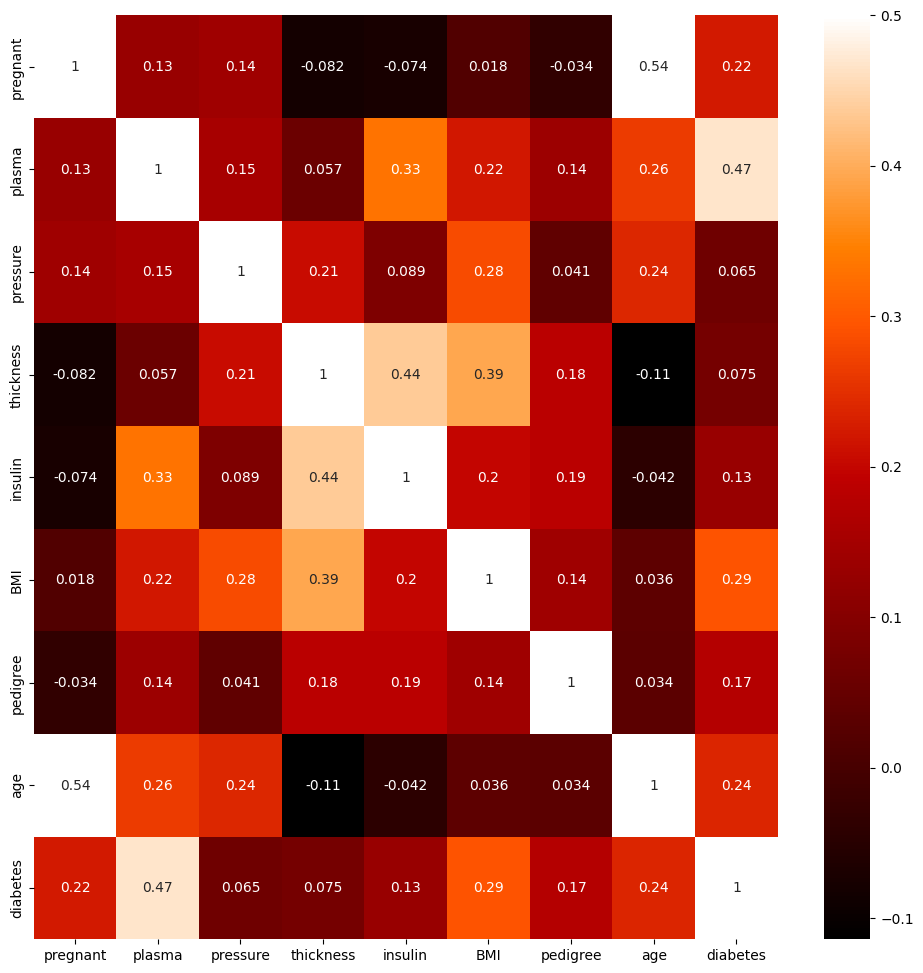

In [8]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.0,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

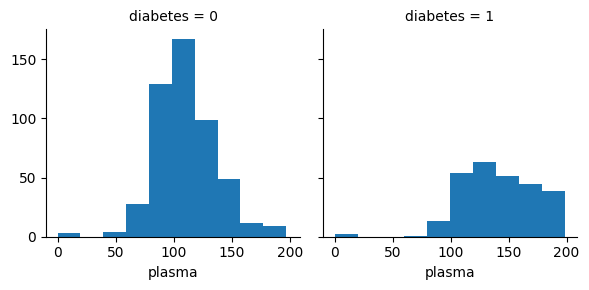

In [9]:
grid = sns.FacetGrid(df, col='diabetes')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

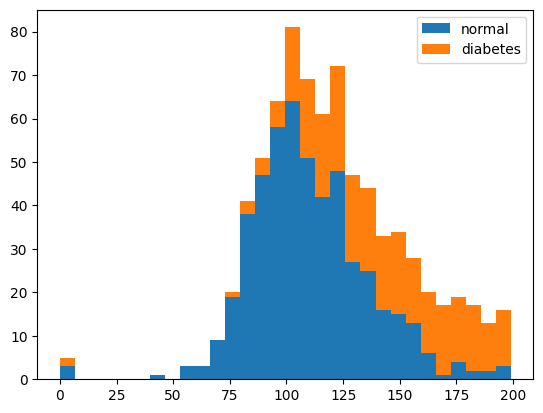

In [10]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], 
         bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [16]:
np.random.seed(3)
tf.random.set_seed(3)

In [17]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [18]:
model = Sequential()

model.add(Dense(30, input_dim = 8, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

c:\Users\hjoon\anaconda3\envs\kloudenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

* 0.739의 정확도를 가짐

In [20]:
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step - accuracy: 0.6341 - loss: 3.0009
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.6231 - loss: 0.9882
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6148 - loss: 0.8756
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.6493 - loss: 0.7913
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.6468 - loss: 0.7269
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6528 - loss: 0.6973
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6605 - loss: 0.6745  
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.6649 - loss: 0.6560
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.6823 - loss: 0.6419
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.6883 - loss: 0.6277
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.6892 - loss: 0.6229
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 0